# Double 7's Portfolio
    
    (optimize period)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from talib.abstract import *

import pinkfish as pf
import strategy

# format price data
pd.options.display.float_format = '{:0.2f}'.format

%matplotlib inline

In [2]:
# set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

Some global data

In [3]:
#symbols = ['XLB', 'XLE', 'XLF', 'XLI', 'XLK', 'XLP', 'XLU', 'XLV', 'XLY']
symbols = ['IWB', 'SPY', 'VGK', 'IEV', 'EWJ', 'EPP', 'IEF', 'SHY', 'GLD']
#symbols = ['SPY', 'TLT']

capital = 10000
start = datetime.datetime(1900, 1, 1)
#start = datetime.datetime.strptime(pf.SP500_BEGIN, '%Y-%m-%d')
end = datetime.datetime.now()
#end = datetime.datetime(2019, 1, 1)
period = 6

use_cache = True
use_regime_filter = False

Define Optimizations

In [4]:
# pick one
optimize_period = True

# define period
if optimize_period:
    Xs = range(3, 18+1, 1)
    Xs = [str(X) for X in Xs]

Run Strategy

In [5]:
strategies = pd.Series(dtype=object)
for X in Xs:
    print("{0}".format(X), end=" ")
    if optimize_period:
        strategies[X] = strategy.Strategy(symbols, capital, start, end, margin=1, period=int(X),
                                          use_cache=use_cache, use_regime_filter=use_regime_filter)
    strategies[X].run()
    strategies[X].rlog, strategies[X].tlog, strategies[X].dbal = strategies[X].get_logs()
    strategies[X].stats = strategies[X].get_stats()

3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 

Summarize results

In [6]:
metrics = ('annual_return_rate',
           'max_closed_out_drawdown',
           'drawdown_annualized_return',
           'drawdown_recovery',
           'best_month',
           'worst_month',
           'sharpe_ratio',
           'sortino_ratio',
           'monthly_std',
           'pct_time_in_market',
           'total_num_trades',
           'pct_profitable_trades',
           'avg_points')

df = strategy.summary(strategies, metrics)
df

,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
annual_return_rate,6.75,4.72,5.13,5.04,4.67,4.38,5.19,5.83,5.06,5.00,4.41,3.81,3.97,3.58,2.85,2.76
max_closed_out_drawdown,-19.85,-19.41,-21.32,-22.18,-22.12,-21.96,-21.54,-23.06,-24.32,-26.56,-30.20,-31.24,-31.02,-30.24,-32.19,-32.21
drawdown_annualized_return,-2.94,-4.11,-4.15,-4.40,-4.74,-5.01,-4.15,-3.95,-4.80,-5.31,-6.85,-8.20,-7.82,-8.46,-11.29,-11.66
drawdown_recovery,-0.11,-0.09,-2.18,-0.50,-0.46,-0.41,-0.41,-0.41,-0.41,-0.84,-0.84,-0.84,-0.83,-0.83,-0.90,-1.20
best_month,17.00,16.03,16.76,14.34,13.44,12.60,14.05,13.30,13.31,14.01,15.54,15.43,15.69,11.58,11.48,11.98
worst_month,-19.25,-18.76,-18.78,-17.89,-18.45,-19.75,-19.64,-18.77,-18.71,-19.28,-20.21,-20.31,-21.11,-20.85,-20.40,-20.38
sharpe_ratio,0.68,0.49,0.53,0.52,0.49,0.46,0.54,0.59,0.52,0.51,0.46,0.41,0.42,0.39,0.32,0.31
sortino_ratio,0.73,0.52,0.56,0.56,0.51,0.48,0.56,0.62,0.53,0.52,0.47,0.41,0.43,0.40,0.33,0.32
monthly_std,2.36,2.41,2.41,2.40,2.40,2.37,2.37,2.35,2.33,2.37,2.47,2.48,2.51,2.43,2.41,2.44
pct_time_in_market,91.82,90.25,90.17,90.87,90.30,89.90,89.49,88.95,88.14,87.59,87.62,86.81,88.06,88.16,88.14,89.17


Bar graphs

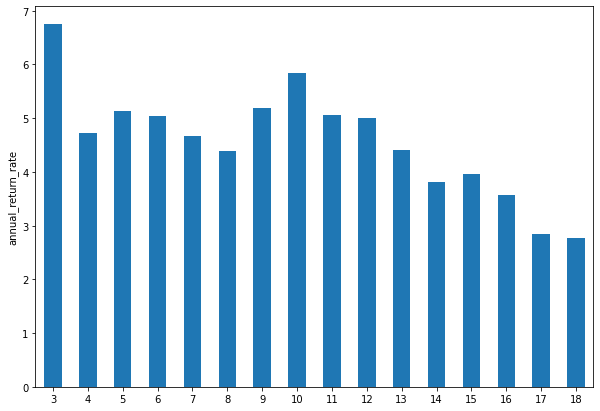

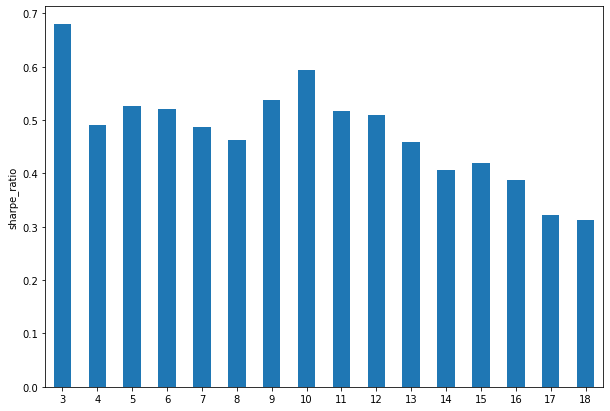

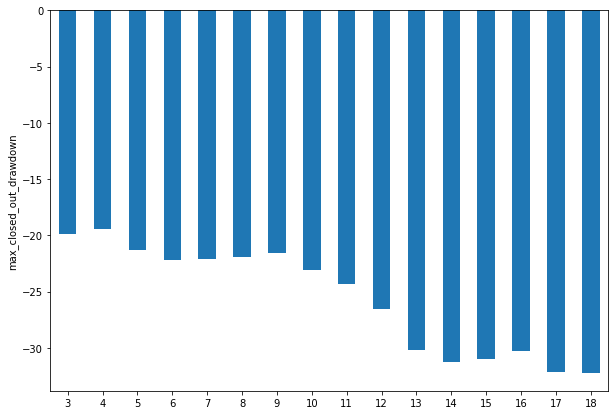

In [7]:
strategy.plot_bar_graph(df, 'annual_return_rate')
strategy.plot_bar_graph(df, 'sharpe_ratio')
strategy.plot_bar_graph(df, 'max_closed_out_drawdown')

Run Benchmark

In [8]:
s = strategies[Xs[0]]
benchmark = pf.Benchmark('SPY', capital, s.start, s.end, use_adj=True)
benchmark.run()
benchmark.tlog, benchmark.dbal = benchmark.get_logs()
benchmark.stats = benchmark.get_stats()

2005-12-21 00:00:00 BUY  106 SPY @ 93.97
2020-08-21 00:00:00 SELL 106 SPY @ 339.15


Equity curve

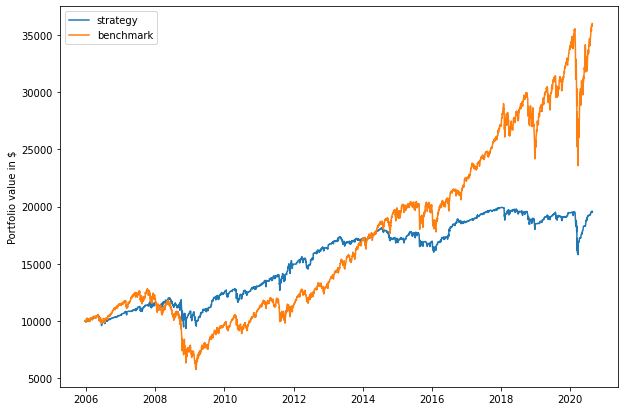

In [9]:
if optimize_period: Y = '7'

pf.plot_equity_curve(strategies[Y].dbal, benchmark=benchmark.dbal)

In [10]:
def plot_equity_curves(strategies):
    """
    Plot Equity Curve: multiple equity curves on same plot
    Arguement is daily balance.
    """
    fig = plt.figure(figsize=(16,12))
    axes = fig.add_subplot(111, ylabel='Portfolio value in $')
    for strategy in strategies:
        axes.plot(strategy.dbal['close'], label=strategy.period)

    plt.legend(loc='best')

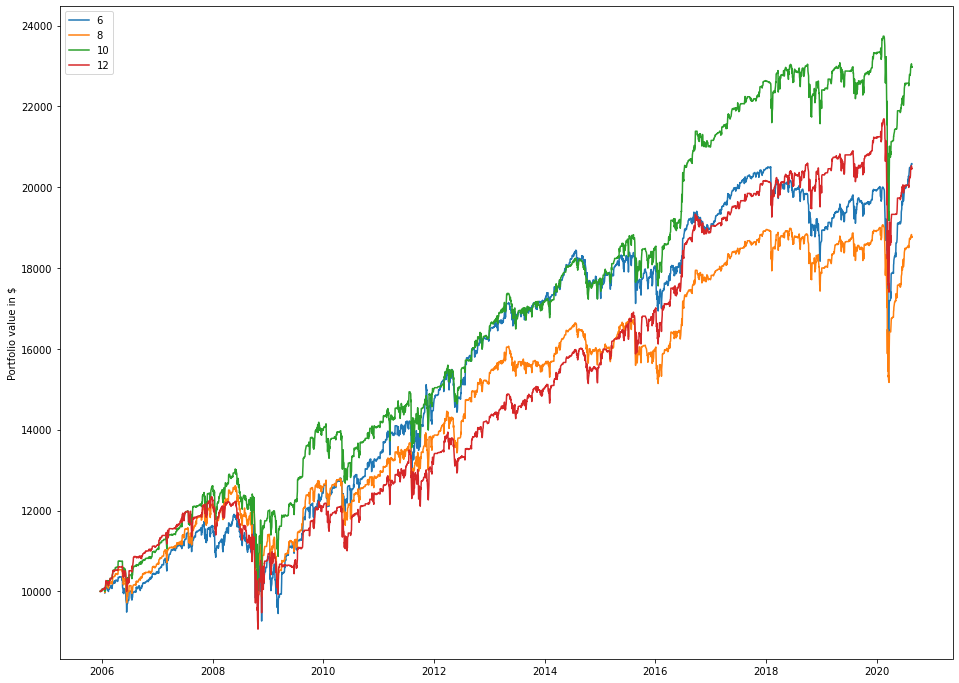

In [11]:
plot_equity_curves(strategies[3:10:2])